In [1]:
!pip install opencv-python

In [2]:
!pip install matplotlib

In [3]:
!pip install numpy

In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import cv2
img_array = cv2.imread(r"C:/Users/Rachna Ramesh/OneDrive/Desktop/Training/0/Training_3908.jpg")


In [6]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


In [7]:
img_array.shape

(48, 48, 3)

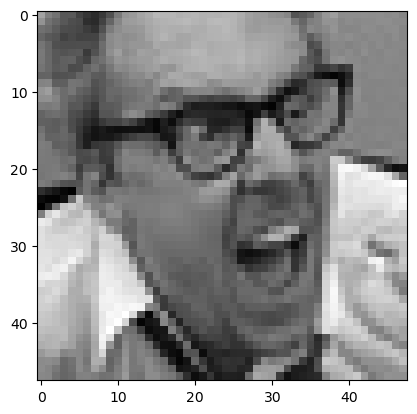

In [8]:
plt.imshow(img_array)

In [9]:
Datadirectory = "Training/"

In [10]:
Classes = ["0","1","2","3","4","5","6"]

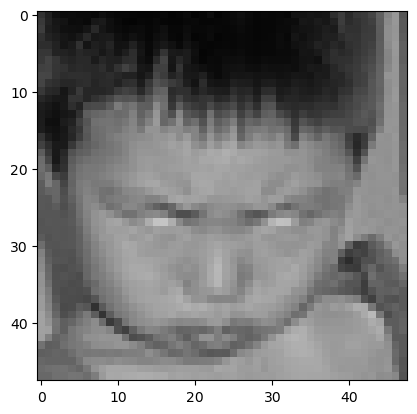

In [11]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

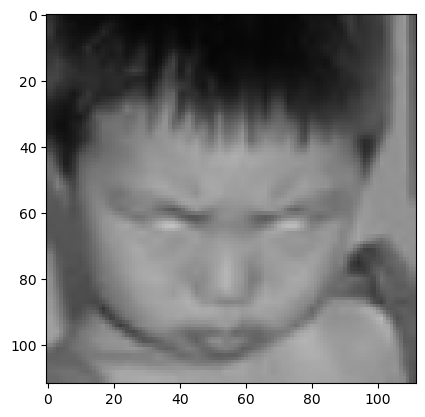

In [12]:
img_size = 112
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [14]:
create_training_Data()

In [15]:
print(len(training_Data))

28709


In [16]:
import random 

random.shuffle(training_Data)

In [17]:
# Separate the features (images) and labels (classes)
X = []  # Feature array (images)
y = []  # Label array (classes)

for features, label in training_Data:
    X.append(features)
    y.append(label)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (28709, 112, 112, 3)
Labels shape: (28709,)


In [18]:
batch_size = 100  # Adjust based on your system's RAM
normalized_batches = []

for i in range(0, len(X), batch_size):
    batch = X[i:i + batch_size].astype('float32') / 255.0
    normalized_batches.append(batch)

# Combine batches back into a single array
X = np.concatenate(normalized_batches, axis=0)

In [19]:
y[0]

3

In [20]:
Y = np.array(y)

In [21]:
Y.shape

(28709,)

In [22]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.MobileNetV2()

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [25]:
base_input = keras.Input(shape=(64, 64, 3))  # Adjust input size to 112x112

In [26]:
base_output = model.layers[-2].output

In [27]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [28]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output)

In [29]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_161>

In [30]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [31]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [32]:
X = X.astype('float16')  # Use float16 to reduce memory usage

In [33]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [34]:
X_resized = tf.image.resize(X, (64, 64))  # Resize to smaller dimensions if needed

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)  # Optional rescaling if not already done
train_generator = datagen.flow(X_resized, Y, batch_size=32)  # Create the generator

In [36]:
new_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',  # Change according to your task (e.g., 'categorical_crossentropy')
                  metrics=['accuracy'])

In [37]:
import tensorflow as tf

# Normalize and cast to float16
X_resized = tf.cast(X_resized, tf.float16) / 255.0

In [38]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
new_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(64, 64, 3)),  # Input layer with new shape
    
    # First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    
    # First MaxPooling layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    
    # Second MaxPooling layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output from the convolutional layers
    tf.keras.layers.Flatten(),
    
    # Fully connected layer with 128 neurons
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Output layer with softmax activation (for multi-class classification)
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming 10 classes, adjust as needed
])

In [40]:
new_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [41]:
# Rescale pixel values to the range [0, 1]
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Assuming X_resized is your image data (e.g., shape (num_samples, 64, 64, 3))
train_generator = datagen.flow(X_resized, Y, batch_size=32)  # X_resized: images, Y: labels

In [42]:
new_model.fit(train_generator, epochs=7)  # Train for 5 epochs, adjust as needed

C:\Users\Rachna Ramesh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2190s 2s/step - accuracy: 0.2462 - loss: 1.8521
Epoch 2/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2078s 2s/step - accuracy: 0.2538 - loss: 1.8168
Epoch 3/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2083s 2s/step - accuracy: 0.2454 - loss: 1.8171
Epoch 4/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2290s 3s/step - accuracy: 0.2524 - loss: 1.8116
Epoch 5/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2265s 3s/step - accuracy: 0.2510 - loss: 1.8143
Epoch 6/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2123s 2s/step - accuracy: 0.2496 - loss: 1.8146
Epoch 7/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2041s 2s/step - accuracy: 0.2535 - loss: 1.8112


In [86]:
new_model.fit(train_generator, epochs=7)

Epoch 1/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2318s 3s/step - accuracy: 0.2510 - loss: 1.8134
Epoch 2/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2352s 3s/step - accuracy: 0.2531 - loss: 1.8105
Epoch 3/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2207s 2s/step - accuracy: 0.2517 - loss: 1.8083
Epoch 4/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2136s 2s/step - accuracy: 0.2496 - loss: 1.8147
Epoch 5/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2133s 2s/step - accuracy: 0.2501 - loss: 1.8145
Epoch 6/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 2101s 2s/step - accuracy: 0.2513 - loss: 1.8102
Epoch 7/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 1997s 2s/step - accuracy: 0.2437 - loss: 1.8176


In [88]:
new_model.fit(train_generator, epochs=3)

Epoch 1/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 2383s 3s/step - accuracy: 0.2527 - loss: 1.8109
Epoch 2/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 2152s 2s/step - accuracy: 0.2508 - loss: 1.8116
Epoch 3/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 2359s 3s/step - accuracy: 0.2479 - loss: 1.8123


In [97]:
# Save the model in the native Keras format
new_model.save("my_model.keras")

In [99]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("my_model.keras")

# Verify the loaded model
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,235,930 (16.16 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,117,968 (8.08 MB)

In [101]:
frame = cv2.imread("happyboy.jpg")

In [103]:
frame.shape

(1023, 1023, 3)

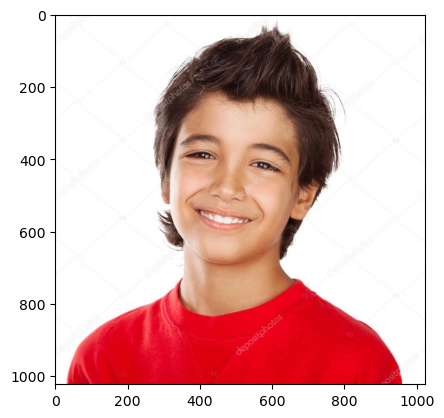

In [105]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [107]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [109]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [111]:
gray.shape

(1023, 1023)

In [113]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

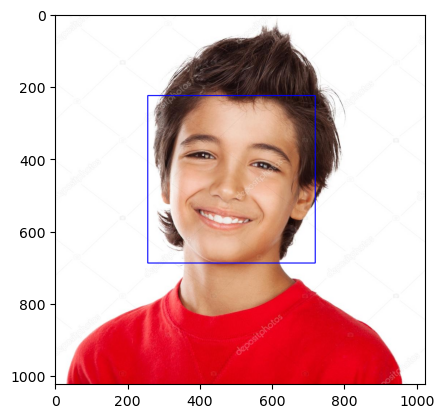

In [115]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

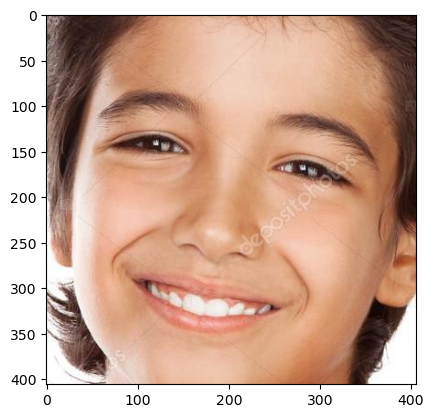

In [117]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [125]:
final_image = cv2.resize(face_roi, (64,64))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [127]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


In [129]:
Predictions[0]

array([3.9337e-02, 0.0000e+00, 1.3151e-03, 9.3848e-01, 1.1185e-02,
       9.6436e-03, 1.0961e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
      dtype=float16)

In [131]:
np.argmax(Predictions)

3

In [136]:
!pip install deepface

In [5]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained model
new_model = load_model("my_model.keras")  # Replace with your model file path

# Font settings for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX

# Emotion labels
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Start webcam capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) for the face
        roi_color = frame[y:y+h, x:x+w]

        # Preprocess the ROI to match the model input size (64x64x3)
        face_roi = cv2.resize(roi_color, (64, 64))  # Resize to (64, 64)
        face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension
        face_roi = face_roi / 255.0  # Normalize pixel values to [0, 1]

        # Make predictions using the model
        predictions = new_model.predict(face_roi)
        print("Raw Predictions:", predictions)  # Debugging: Print raw predictions

        # Get the most confident prediction
        confidence = np.max(predictions)
        max_index = np.argmax(predictions)

        # Check confidence and assign emotion
        if confidence > 0.6:
            status = emotions[max_index]
        else:
            status = "Uncertain"

        # Debugging: Show confidence and predicted emotion
        print(f"Predicted Emotion: {status}, Confidence: {confidence}")

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the emotion on the frame
        cv2.rectangle(frame, (x, y - 50), (x + w, y), (0, 0, 0), -1)  # Black rectangle
        cv2.putText(frame, status, (x, y - 10), font, 0.7, (0, 255, 0), 2)

    # Display the frame with the detected emotions
    cv2.imshow("Emotion Detection", frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Raw Predictions: [[0.13     0.       0.03268  0.653    0.0915   0.08264  0.010185 0.
  0.       0.      ]]
Predicted Emotion: Happy, Confidence: 0.65283203125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Raw Predictions: [[0.1294  0.      0.0323  0.655   0.09143 0.0823  0.00994 0.      0.
  0.     ]]
Predicted Emotion: Happy, Confidence: 0.65478515625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Raw Predictions: [[0.1276  0.      0.03053 0.6655  0.0883  0.07916 0.0092  0.      0.
  0.     ]]
Predicted Emotion: Happy, Confidence: 0.66552734375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Raw Predictions: [[0.1276  0.      0.03047 0.6655  0.0883  0.07947 0.00916 0.      0.
  0.     ]]
Predicted Emotion: Happy, Confidence: 0.66552734375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Raw Predictions: [[0.1278   0.       0.03055  0.6646   0.0882   0.07965  0.009155 0.
  0.       0.      ]]
Predicted Emotion: Happy, Confidence: 0.66455078125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
